In [160]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [161]:
np.random.seed(0)

In [184]:
data = pd.read_csv("ATM_sample.csv")
data

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
0,10.18,10,1,0,0,0,72.750556
1,9.74,10,1,1,0,0,66.720482
2,0.96,2,0,0,0,1,19.189516
3,9.58,9,1,1,0,1,67.388669
4,1.03,4,0,1,0,1,15.813127
...,...,...,...,...,...,...,...
21995,10.15,12,1,0,0,0,71.384290
21996,1.01,2,0,1,0,0,16.031066
21997,0.96,3,0,1,0,0,14.968847
21998,9.91,6,1,0,0,0,73.705665


In [169]:
response = 'Withdraw'
y = data[response]
predictors = [x for x in list(data.columns) if x not in y]
X = data[predictors]
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [164]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state = 1)

In [174]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_val = scalar.transform(X_val)
X_train = pd.DataFrame(data=X_train)
X_val = pd.DataFrame(data=X_val)

In [222]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True)

k_values = np.arange(1, 51)
mean_mse_values = {}
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k, metric='mahalanobis', metric_params={'V':X_train.cov()})
    mse_scores = -cross_val_score(knn_regressor, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mean_mse = mse_scores.mean()
    mean_mse_values[k] = mean_mse
    
optimal_k = min(mean_mse_values, key=mean_mse_values.get)
optimal_mean_mse = mean_mse_values[optimal_k]

print(f'Optimal K = {optimal_k}: MSE = {optimal_mean_mse}')

Optimal K = 2: MSE = 0.0548671551412326


0.047890213585631405


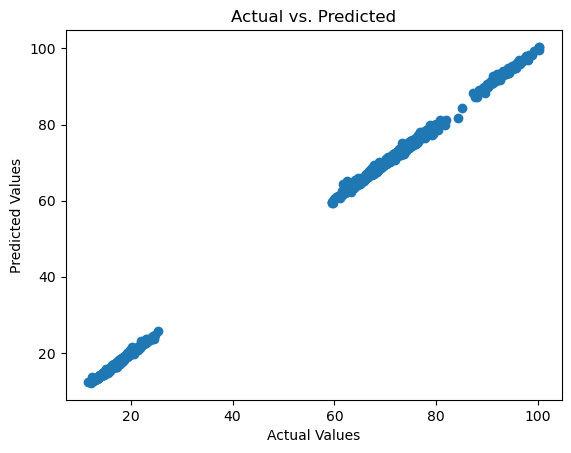

In [223]:
from sklearn.model_selection import train_test_split

best_knn = KNeighborsRegressor(n_neighbors=optimal_k, metric='mahalanobis', metric_params={'V':X_train.cov()})
best_knn.fit(X_train, y_train)
predictions = best_knn.predict(X_val)
val_mse = (mean_squared_error(y_val, predictions))
print(val_mse)
plt.scatter(y_val, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()

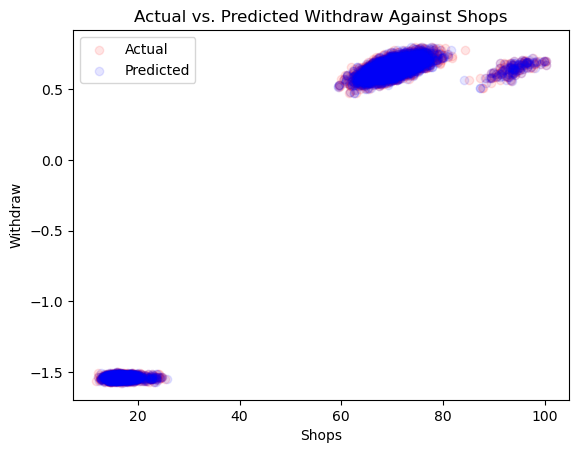

In [224]:
plt.scatter(y_val, X_val[0], c='r', alpha=0.1, label='Actual')
plt.scatter(predictions, X_val[0], c='b', alpha=0.1, label='Predicted')
plt.xlabel('Shops')
plt.ylabel('Withdraw')
plt.title('Actual vs. Predicted Withdraw Against Shops')
plt.legend()
plt.show()

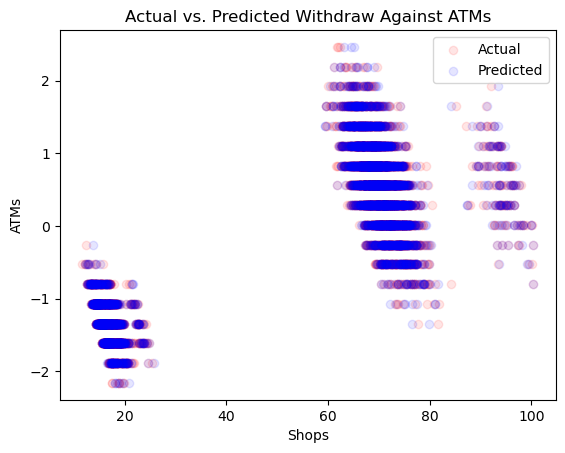

In [225]:
plt.scatter(y_val, X_val[1], c='r', alpha=0.1, label='Actual')
plt.scatter(predictions, X_val[1], c='b', alpha=0.1, label='Predicted')
plt.xlabel('Shops')
plt.ylabel('ATMs')
plt.title('Actual vs. Predicted Withdraw Against ATMs')
plt.legend()
plt.show()

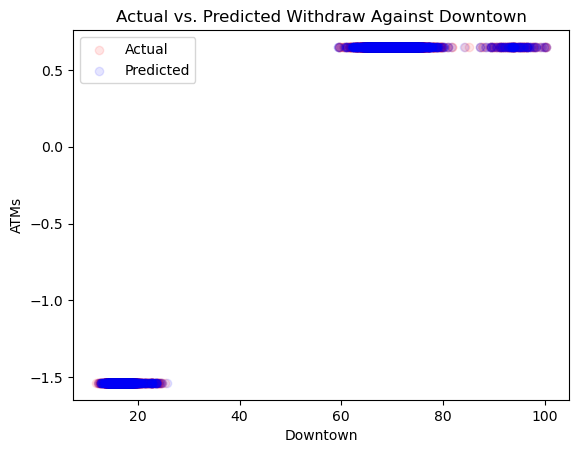

In [228]:
plt.scatter(y_val, X_val[2], c='r', alpha=0.1, label='Actual')
plt.scatter(predictions, X_val[2], c='b', alpha=0.1, label='Predicted')
plt.xlabel('Downtown')
plt.ylabel('ATMs')
plt.title('Actual vs. Predicted Withdraw Against Downtown')
plt.legend()
plt.show()